# Assignment 2: Analytic Report project

## Introduction

- The main goal of the project is to have an overview of data sets regarding description, visualization and different tests application

- Specifically, the task is to predict attrition rate of valuable employees in the IBM Human Resources datasets created by IBM scientists

## Datasets

https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

## Contents (3 parts)

1. What are key factors that are playing into current attrition rates?    
2. What are key factors that are playing into current satisfaction rates?    
3. When are employees leaving?



### loading datasets and import libraries

In [98]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# modify the number of maximum displayed rows and columns
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


### The data consists of 1470 rows and 35 columns. Among 35 columns, 26 are numeric, 9 are categorical
### Assume that later on, we neglect the effect 9 of categorical features and take into account the 26 numeric features

In [99]:
df.shape

(1470, 35)

In [100]:
# check the number of numeric and categorical data
df.select_dtypes(include=np.number).shape

(1470, 26)

-------------------------

## 1. What are key factors that are playing into current attrition rates?

In [101]:
# compute the avarage of numeric features with respect to the value (Yes, No) of Attrition
df.groupby('Attrition').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.645580,15.231144,3.153285,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,15.097046,3.156118,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


### In the Attrition columns, there are 1233 values of No and 237 values of Yes 

In [102]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

### Since the Attrition rate is catagorical, we will transform its value (Yes -> 1 and  No -> 0) 
### Assume that the new value (1,0) is linear as the Attrition rate will increase to 1 or decrease to 0

In [181]:
# create a new dataframe to transform the 'Attrition' rate.
df_transform = df.copy()
df_transform.Attrition = df.Attrition.apply(lambda x: 1 if x == 'Yes' else 0)

# dfnum: dataframe consisting of numerical columns
dfnum = df_transform.select_dtypes(include=np.number)

### Split the dfnum into 2 different parts of 'yes' and 'no', where 'yes' , 'no'  consists of the numeric features of people leaving and staying at the company respectively

In [104]:
# yes (237 rows)
yes = dfnum[df.Attrition == 'Yes']
# no (1233 rows)
no = dfnum[df.Attrition == 'No']

### Independent test: 
### H0: the value of corresponding feature (eg. Age, DistanceFromHome,..) in 'yes' and 'no' are SIMILAR 
### H1: the value of corresponding feature (eg. Age, DistanceFromHome,..) in 'yes' and 'no' are DIFFERENT

In [105]:
# compute the ind_test of all numeric features
indttest = dfnum.apply(lambda col: stats.ttest_ind( yes[col.name], no[col.name] )[0]).to_frame().rename(columns={0:'ind-t-test'})
indttest['p-value'] = dfnum.apply(lambda col: stats.ttest_ind( yes[col.name], no[col.name] )[1])

# select the features, where p-value < 0.05
indttest[indttest['p-value'] < 0.05].drop('Attrition', axis = 0)


,ind-t-test,p-value
Age,-6.178664,8.356308e-10
DailyRate,-2.174084,2.985816e-02
DistanceFromHome,2.994708,2.793060e-03
EnvironmentSatisfaction,-3.981860,7.172339e-05
JobInvolvement,-5.024140,5.677065e-07
JobLevel,-6.573838,6.795385e-11
JobSatisfaction,-3.986227,7.043067e-05
MonthlyIncome,-6.203936,7.147364e-10
StockOptionLevel,-5.304762,1.301015e-07
TotalWorkingYears,-6.652255,4.061878e-11


### p-value < 0.05, reject H0, conclude: the value of corresponding feature (eg. Age, DistanceFromHome,..) in 'yes' and 'no' are DIFFERENT
### In other words, these corresponding features will have an impact on the Attrition rate
### I select 5 features that considerably affect the Attrion rate: TotalWorkingYears, JobLevel, MonthlyIncome, Age, YearsInCurrentRole

---------------------

## - TotalWorkingYears

### plot 2 histograms: - hist1: TotalWorkingYears of people leaving;  -hist2: TotalWorkingYears of people not leaving


<IPython.core.display.Javascript object>


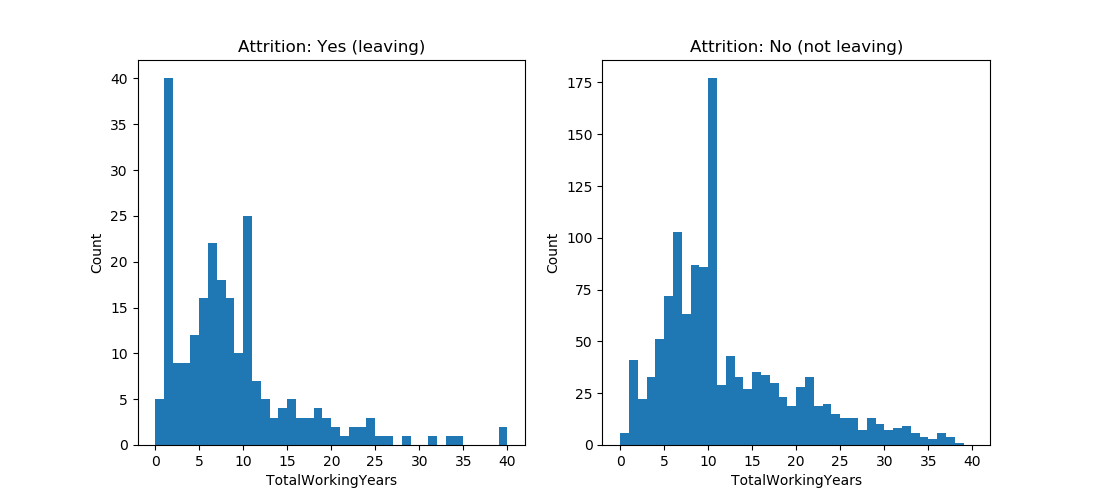

In [106]:
plt.figure(num=1, figsize=(11,5))
bins = np.arange(start=0, stop=41, step=1)
plt.subplot(121)
plt.title('Attrition: Yes (leaving)')
plt.xlabel('TotalWorkingYears')
plt.ylabel('Count')
plt.hist(yes['TotalWorkingYears'], bins=bins) 

plt.subplot(122)
plt.title('Attrition: No (not leaving)')
plt.xlabel('TotalWorkingYears')
plt.ylabel('Count')
plt.hist(no['TotalWorkingYears'], bins=bins)

plt.show()

### independent t-test 

H0: the 'TotalWorkingYears' of the people leaving (Yes) and not leaving (No) are SIMILAR 

H1: the 'TotalWorkingYears' of the people leaving (Yes) and not leaving (No) are DIFFERENT 

In [108]:
stats.ttest_ind(yes.TotalWorkingYears, no.TotalWorkingYears)

Ttest_indResult(statistic=-6.6522546135024445, pvalue=4.0618781112668525e-11)

p-value < 0.05, reject H0, the 'TotalWorkingYears' of people who leaves (Yes) is smaller than those who don't (No)

In other words, the 'TotalWorkingYears' will affect the Attrition rate

### 1-sample t-test

H0: The 'Attrition' rate of people with 'TotalWorkingYears' < 10 is the SAME as the 'TotalWorkingYears' population

H1: The 'Attrition' rate of people with 'TotalWorkingYears' < 10 is DIFFERENT from the 'TotalWorkingYears' population

In [111]:
stats.ttest_1samp(dfnum['Attrition'][dfnum.TotalWorkingYears < 10], dfnum['Attrition'].mean())

Ttest_1sampResult(statistic=3.6751968165185565, pvalue=0.00025531848041836626)

### p-value < 0.05, reject H0, People with 'TotalWorkingYears' < 10 has a HIGHER 'Attrition' rate than the rest

### 1-sample t-test

H0: The 'Attrition' rate of people with 'TotalWorkingYears' >= 10 is the SAME as the 'TotalWorkingYears' population

H1: The 'Attrition' rate of people with 'TotalWorkingYears' >= 10 is DIFFERENT from the 'TotalWorkingYears' population

In [163]:
stats.ttest_1samp(dfnum['Attrition'][dfnum.TotalWorkingYears >= 10], dfnum['Attrition'].mean())

Ttest_1sampResult(statistic=-4.818329304968034, pvalue=1.75326899707373e-06)

### p-value < 0.05, reject H0, People with 'TotalWorkingYears' >= 10 has a LOWER 'Attrition' rate than the rest

---------------

### In conclusion: People with 'TotalWorkingYears' < 10 has a HIGHER chance to leave

## - Job Level

### plot 2 histograms: - hist1: 'JobLevel' of people leaving;  -hist2: 'JobLevel' of people not leaving

<IPython.core.display.Javascript object>


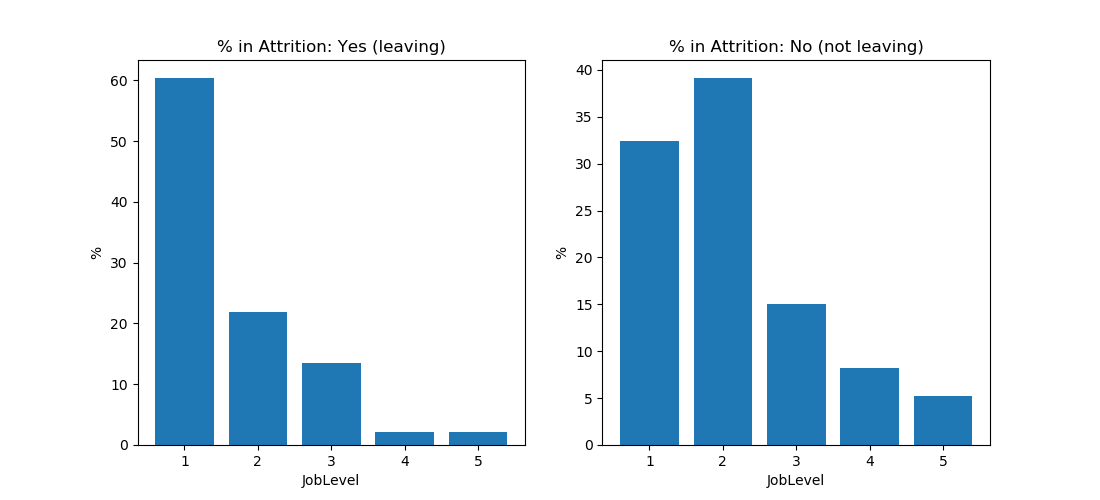

In [164]:
plt.figure(num=2, figsize=(11,5))
plt.subplot(121)
plt.bar(yes.JobLevel.value_counts().index, yes.JobLevel.value_counts()/237*100)
plt.title('% in Attrition: Yes (leaving)')
plt.xlabel('JobLevel')
plt.ylabel('%')

plt.subplot(122)
plt.bar(no.JobLevel.value_counts().index, no.JobLevel.value_counts()/1233*100)
plt.title('% in Attrition: No (not leaving)')
plt.xlabel('JobLevel')
plt.ylabel('%')
plt.show()

### 1-sample t-test 

H0: The 'Attrition' rate of people with 'JobLevel' = 1 is the SAME as the 'JobLevel' population

H1: The 'Attrition' rate of people with 'JobLevel' = 1 is DIFFERENT from the 'JobLevel' population

In [166]:
stats.ttest_1samp(dfnum['Attrition'][dfnum.JobLevel == 1], dfnum['Attrition'].mean())

Ttest_1sampResult(statistic=5.398127494494055, pvalue=1.0086123458823775e-07)

### p-value < 0.05, reject H0, People with 'JobLevel' = 1 has a HIGHER 'Attrition' rate than the rest

### 1-sample t-test 

H0: The 'Attrition' rate of people with 'JobLevel' from 2 to 5 is the SAME as the 'JobLevel' population

H1: The 'Attrition' rate of people with 'JobLevel' from 2 to 5 DIFFERENT from the 'JobLevel' population

In [126]:
stats.ttest_1samp(dfnum['Attrition'][dfnum.JobLevel > 1], dfnum['Attrition'].mean())

Ttest_1sampResult(statistic=-6.030600711298928, pvalue=2.3579102557232625e-09)

### p-value < 0.05, reject H0, People with 'JobLevel' from 2 to 5 has a LOWER 'Attrition' rate than the rest

### Final conclusion: the 'JobLevel' has an impact on the 'Attrition' rate, especially at the mark 'JobLevel' = 1, people will have HIGHER chance to leave

---------------------------------

## - MonthlyIncome

### plot 2 histograms: - hist1: 'MonthlyIncome' of people leaving;  -hist2: 'MonthlyIncome' of people not leaving

<IPython.core.display.Javascript object>


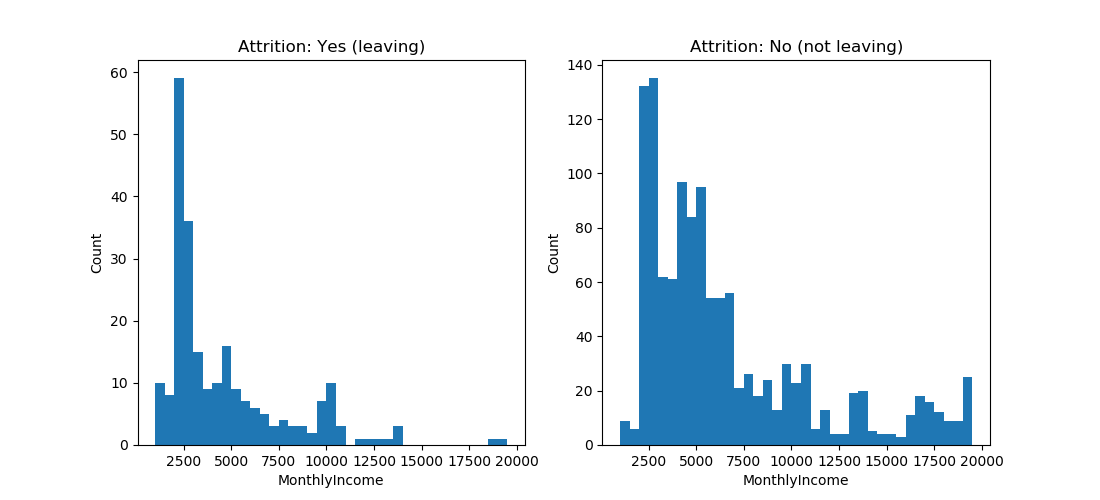

In [168]:
plt.figure(num=3, figsize=(11,5))

bins1 = np.arange(start=1000, stop=20000, step=500)

plt.subplot(121)
plt.hist(yes.MonthlyIncome, bins=bins1)
plt.title('Attrition: Yes (leaving)')
plt.xlabel('MonthlyIncome')
plt.ylabel('Count')

plt.subplot(122)
plt.hist(no.MonthlyIncome, bins=bins1)
plt.title('Attrition: No (not leaving)')
plt.xlabel('MonthlyIncome')
plt.ylabel('Count')
plt.show()

### 1-sample t-test

H0: The 'Attrition' rate of people with 'MonthlyIncome' < 3000 is the SAME as the 'MonthlyIncome' population

H1: The 'Attrition' rate of people with 'MonthlyIncome' < 3000 is DIFFERENT from the 'MonthlyIncome' population

In [169]:
stats.ttest_1samp(dfnum['Attrition'][dfnum.MonthlyIncome < 3000], dfnum['Attrition'].mean())

Ttest_1sampResult(statistic=5.483717259368175, pvalue=7.456618912418115e-08)

### p-value < 0.05, reject H0, People with 'MonthlyIncome' < 3000 has a HIGHER 'Attrition' rate than the rest

-------------------------

### 1-sample t-test

H0: The 'Attrition' rate of people with 'MonthlyIncome' > 3000 is the SAME as the 'MonthlyIncome' population

H1: The 'Attrition' rate of people with 'MonthlyIncome' > 3000 is DIFFERENT from the 'MonthlyIncome' population

In [137]:
stats.ttest_1samp(dfnum['Attrition'][dfnum.MonthlyIncome > 3000], dfnum['Attrition'].mean())

Ttest_1sampResult(statistic=-4.706431683900162, pvalue=2.8499969314418944e-06)

### p-value < 0.05, reject H0, People with 'MonthlyIncome' > 3000 has a LOWER 'Attrition' rate than the rest

--------------------------------------

## - Age 

### plot 2 histograms: - hist1: 'Age' of people leaving;  -hist2: 'Age' of people not leaving

<IPython.core.display.Javascript object>


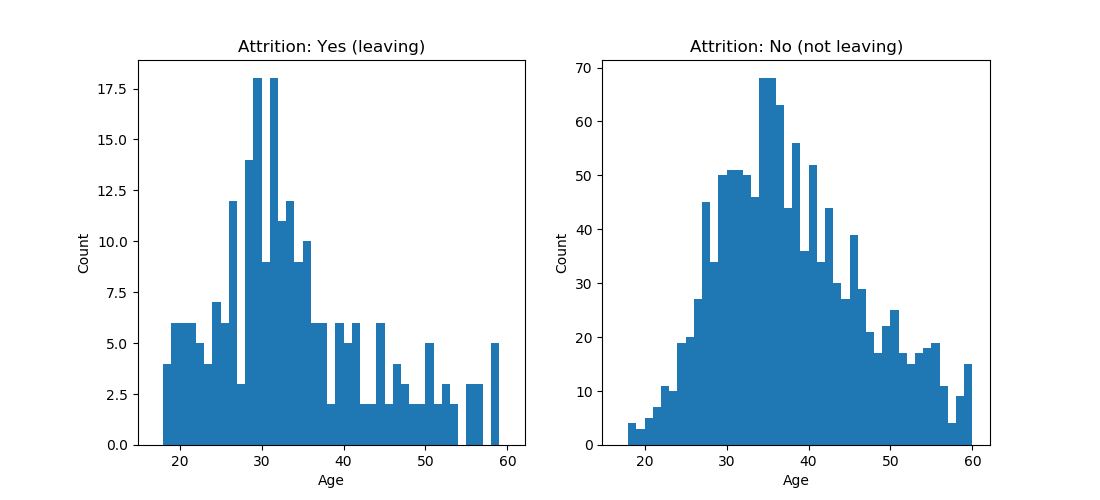

In [171]:
plt.figure(num=4, figsize=(11,5))

bins2 = np.arange(start=17, stop=61, step=1)

plt.subplot(121)
plt.hist(yes.Age, bins=bins2)
plt.title('Attrition: Yes (leaving)')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(122)
plt.hist(no.Age, bins=bins2)
plt.title('Attrition: No (not leaving)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### 1-sample t-test

H0: The 'Attrition' rate of people with 'Age' < 34 is the SAME as the 'Age' population

H1: The 'Attrition' rate of people with 'Age' < 34 is DIFFERENT from the 'Age' population

In [172]:
stats.ttest_1samp(dfnum['Attrition'][dfnum.Age < 34], dfnum['Attrition'].mean())

Ttest_1sampResult(statistic=4.694416407252185, pvalue=3.348859541739543e-06)

### p-value < 0.05, reject H0, People with 'Age' < 34 has a HIGHER 'Attrition' rate than the rest

--------------------------

### 1-sample t-test

H0: The 'Attrition' rate of people with 'Age' >= 34 is the SAME as the 'Age' population

H1: The 'Attrition' rate of people with 'Age' >= 34 is DIFFERENT from the 'Age' population

In [174]:
stats.ttest_1samp(dfnum['Attrition'][dfnum.Age >= 34], dfnum['Attrition'].mean())

Ttest_1sampResult(statistic=-5.23104807333848, pvalue=2.09992910686597e-07)

### p-value < 0.05, reject H0, People with 'Age' >= 34 has a LOWER 'Attrition' rate than the rest

-------------------

### Final conclusion: People leaving the company tend to be younger (mark < 34 years old)

-------------

## - YearsInCurrentRole

### plot 2 histograms: - hist1: 'YearsInCurrentRole' of people leaving;  -hist2: 'YearsInCurrentRole' of people not leaving

<IPython.core.display.Javascript object>


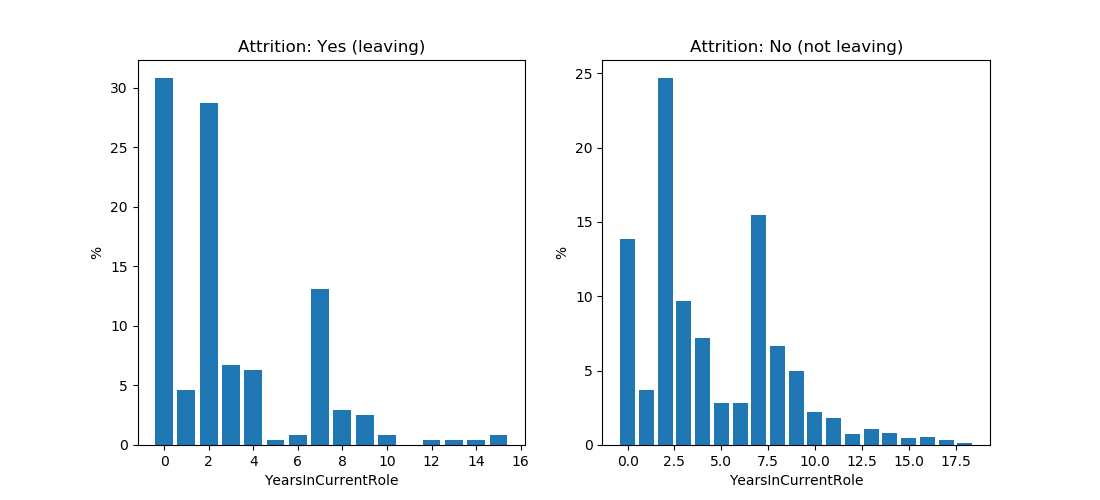

In [175]:
plt.figure(num=5, figsize=(11,5))


plt.subplot(121)
plt.bar(yes.YearsInCurrentRole.value_counts().index, yes.YearsInCurrentRole.value_counts()/237*100)
plt.title('Attrition: Yes (leaving)')
plt.xlabel('YearsInCurrentRole')
plt.ylabel('%')

plt.subplot(122)
plt.bar(no.YearsInCurrentRole.value_counts().index, no.YearsInCurrentRole.value_counts()/1233*100)
plt.title('Attrition: No (not leaving)')
plt.xlabel('YearsInCurrentRole')
plt.ylabel('%')
plt.show()

### 1-sample t-test 

H0: The 'Attrition' rate of people with 'YearsInCurrentRole' = 0 is the SAME as the 'YearsInCurrentRole' population

H1: The 'Attrition' rate of people with 'YearsInCurrentRole' = 0 is DIFFERENT from the 'YearsInCurrentRole' population

In [176]:
stats.ttest_1samp(dfnum['Attrition'][dfnum.YearsInCurrentRole == 0], dfnum['Attrition'].mean())

Ttest_1sampResult(statistic=4.696491727972339, pvalue=4.42892584523386e-06)

### p-value < 0.05, reject H0, People with 'YearsInCurrentRole' = 0 has a HIGHER 'Attrition' rate than the rest

----------------------

### 1-sample t-test 

H0: The 'Attrition' rate of people with 'YearsInCurrentRole' >= 5 is the SAME as the 'YearsInCurrentRole' population

H1: The 'Attrition' rate of people with 'YearsInCurrentRole' >= 5 is DIFFERENT from the 'YearsInCurrentRole' populatio

In [177]:
stats.ttest_1samp(dfnum['Attrition'][dfnum.YearsInCurrentRole >= 5], dfnum['Attrition'].mean())

Ttest_1sampResult(statistic=-5.144871904892533, pvalue=3.715196036610686e-07)

### p-value < 0.05, reject H0, People with 'YearsInCurrentRole' >= 5 has a LOWER 'Attrition' rate than the rest

-------------

### Final conclusion, People with the number of 'YearsInCurrentRole' = 0 has a HIGHER chance to leave

----------------------

# 2. What are key factors that are playing into current satisfaction rates?

In [180]:
# compute the avarage of numeric features with respect to the value (Yes, No) of Attrition
dfnum.groupby('JobSatisfaction').mean()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
JobSatisfaction,,,,,,,,,,,,,,,,,,,,,,,,,,
1,36.916955,0.228374,782.505190,9.190311,2.944637,1.0,1057.885813,2.743945,68.636678,2.761246,2.055363,6561.570934,14095.377163,2.871972,15.231834,3.166090,2.730104,80.0,0.788927,11.608997,2.816609,2.771626,6.989619,4.276817,2.314879,4.384083
2,36.985714,0.164286,771.675000,9.103571,2.896429,1.0,1054.414286,2.764286,66.632143,2.728571,2.075000,6527.328571,14392.317857,2.839286,15.117857,3.153571,2.735714,80.0,0.800000,11.360714,2.839286,2.767857,7.107143,4.135714,2.200000,4.075000
3,37.022624,0.165158,835.500000,9.418552,2.914027,1.0,1024.705882,2.651584,64.882353,2.726244,2.074661,6480.495475,14623.020362,2.667421,15.013575,3.126697,2.696833,80.0,0.762443,11.106335,2.742081,2.782805,7.004525,4.285068,2.138009,4.033937
4,36.795207,0.113290,802.069717,9.030501,2.901961,1.0,986.202614,2.749455,64.681917,2.714597,2.052288,6472.732026,14103.429194,2.516340,15.440087,3.172113,2.701525,80.0,0.823529,11.189542,2.819172,2.729847,6.962963,4.202614,2.148148,4.074074


### Generally, based on the dataframe above, the numeric features are not much different from each other with respect to 4 levels of the 'JobSatisfaction' 

### Split the dfnum into 4 different parts j1, j2, j3, j4, where they respectively consist of the numeric features of people with JobSatisfaction at 1, 2, 3, 4

In [182]:
j1 = dfnum[dfnum.JobSatisfaction == 1]
j2 = dfnum[dfnum.JobSatisfaction == 2]
j3 = dfnum[dfnum.JobSatisfaction == 3]
j4 = dfnum[dfnum.JobSatisfaction == 4]

### anova-test 
### H0: the value of corresponding feature (eg. Age, DistanceFromHome,..) in j1, j2, j3, j4 are SIMILAR 
### H1: the value of corresponding feature (eg. Age, DistanceFromHome,..) in j1, j2, j3, j4 are DIFFERENT

In [183]:
# compute the ind_test of all numeric features
indttest1 = dfnum.apply(lambda col: stats.f_oneway( j1[col.name], j2[col.name], j3[col.name], j4[col.name] )[0]).to_frame().rename(columns={0:'anova-test'})
indttest1['p-value'] = dfnum.apply(lambda col: stats.f_oneway( j1[col.name], j2[col.name], j3[col.name], j4[col.name] )[1])

# select the features, where p-value < 0.05
indttest1[indttest1['p-value'] < 0.05].drop('JobSatisfaction', axis = 0)

,anova-test,p-value
Attrition,5.889279,0.00054
HourlyRate,2.795356,0.03904


### p-value < 0.05, reject H0, conclude: the value of corresponding feature (eg. Age, DistanceFromHome,..) j1, j2, j3, j4 are DIFFERENT
### In other words, these corresponding features will have an impact on the 'JobSatisfaction'
### I select the 'Attrition' feature to analyze

------------------

### 1-sample t-test

H0: The 'JobSatisfaction' rate of people with 'Attrition' = 1 is the SAME as the 'JobSatisfaction' population

H1: The 'JobSatisfaction' rate of people with 'Attrition' = 1 is DIFFERENT from the 'JobSatisfaction' population

In [158]:
stats.ttest_1samp(dfnum['JobSatisfaction'][dfnum.Attrition == 1], dfnum.JobSatisfaction.mean())

Ttest_1sampResult(statistic=-3.582989304028057, pvalue=0.000412552190534359)

### p-value < 0.05, reject H0, People LEAVING will have a LOWER 'JobSatisfaction' rate than the rest

----------------- 

### 1-sample t-test 

H0: The 'JobSatisfaction' rate of people with 'Attrition' = 0 is the SAME as the 'JobSatisfaction' population

H1: The 'JobSatisfaction' rate of people with 'Attrition' = 0 is DIFFERENT from the 'JobSatisfaction' population

In [159]:
stats.ttest_1samp(dfnum['JobSatisfaction'][dfnum.Attrition == 0], dfnum.JobSatisfaction.mean())

Ttest_1sampResult(statistic=1.6064680759597196, pvalue=0.10842735660676918)

### p-value > 0.05, can't reject H0, People NOT LEAVING will not affect 'JobSatisfaction' rate 

---------------

### Final conclusion: most numeric features do not affect the 'JobSatisfaction' rate.  In contrast, People LEAVING (Attrition = Yes) will possibly decrease the 'JobSatisfaction' rate 

-----------------

# 3. When are employees leaving?

### According to the analyzation in question 1 regarding 'Attrition' rate, I will combine 5 marks of the 5 main factor affecting 'Attrition' rate to be 1 (leaving):
### - TotalWorkingYears < 10
### - JobLevel = 1
### - MonthlyIncome < 3000
### - Age < 34
### - YearsInCurrentRole = 0

In [184]:
df[(df.TotalWorkingYears < 10) & (df.JobLevel == 1) & (df.MonthlyIncome < 3000) & (df.Age < 34) & (df.YearsInCurrentRole == 0)].Attrition.value_counts()

Yes    46
No     39
Name: Attrition, dtype: int64

### There are (46+39) = 85 people that are in 5 conditions above
### 46/85 = 54.12% of those leaves the company

----------------

### As I found that the majority of people leaving are 'Single',

In [192]:
df.groupby('Attrition').MaritalStatus.value_counts()

Attrition  MaritalStatus
No         Married          589
           Single           350
           Divorced         294
Yes        Single           120
           Married           84
           Divorced          33
Name: MaritalStatus, dtype: int64

### I added in 1 more condition 'MaritalStatus' = Single 

In [189]:
df[(df.TotalWorkingYears < 10) & (df.JobLevel == 1) & (df.MonthlyIncome < 3000) & (df.Age < 34) & (df.YearsInCurrentRole == 0) & (df.MaritalStatus == 'Single')].Attrition.value_counts()

Yes    33
No     11
Name: Attrition, dtype: int64

### Based on the results, out of 44 people meeting those 6 conditions, 33/44 = 75% will leave the company

# Final conclusion:  
### - TotalWorkingYears < 10
### - JobLevel = 1
### - MonthlyIncome < 3000
### - Age < 34
### - YearsInCurrentRole = 0  
### - MaritalStatus = 'Single'

### Employees, who has 6 conditions above will have 75% of leaving the company